In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('part-00000-dac123ca-8acd-4f0c-b541-f5a5ed4bf12c-c000.snappy (1).parquet', engine='pyarrow')

In [3]:
df

,date,open,high,low,close,volume,market_cap,price_day,variability
0,05-01-2022,37713.27,38627.86,37585.79,38469.09,27002760110,731986764312,755.82,1042.07
1,04-30-2022,38605.86,38771.21,37697.94,37714.88,23895713731,717596901509,-890.98,1073.27
2,04-29-2022,39768.62,39887.27,38235.54,38609.82,30882994649,734589762490,-1158.80,1651.73
3,04-28-2022,39241.43,40269.47,38941.42,39773.83,33903704907,756698317682,532.40,1328.05
4,04-27-2022,38120.30,39397.92,37997.31,39241.12,30981015184,746531438329,1120.82,1400.61
...,...,...,...,...,...,...,...,...,...
264,05-06-2022,36573.18,36624.36,35482.13,36040.92,37795577489,685953792236,-532.26,1142.23
265,05-05-2022,39695.75,39789.28,35856.52,36575.14,43106256317,696088266356,-3120.61,3932.76
266,05-04-2022,37748.01,39902.95,37732.06,39698.37,36754404490,755491473700,1950.36,2170.89
267,05-03-2022,38528.11,38629.99,37585.62,37750.45,27326943244,718385701943,-777.66,1044.37


In [8]:
month = [int(df.iloc[i,0][1]) for i in range(len(df))]
df['month'] = month

In [17]:
positive_negative = [1 if i > 0 else 0 for i in df['price_day']]

In [19]:
df['positive_negative'] = positive_negative

<AxesSubplot:xlabel='high', ylabel='volume'>

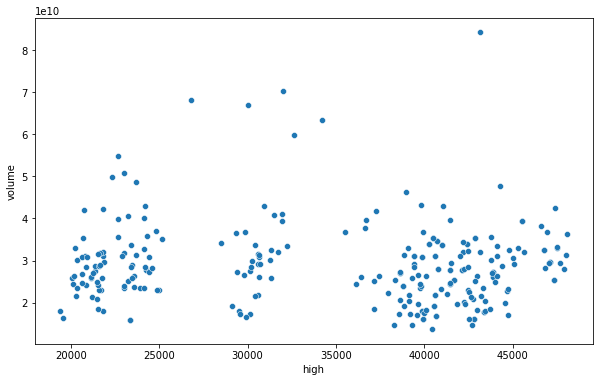

In [6]:
plt.figure(figsize = (10,6))
sns.scatterplot(x=df['high'], y=df['volume'])

<AxesSubplot:xlabel='high', ylabel='volume'>

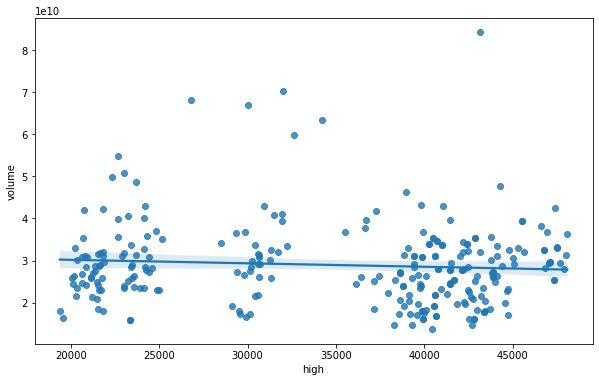

In [7]:
plt.figure(figsize = (10,6))
sns.regplot(x=df['high'], y=df['volume'])

<AxesSubplot:xlabel='price_day', ylabel='market_cap'>

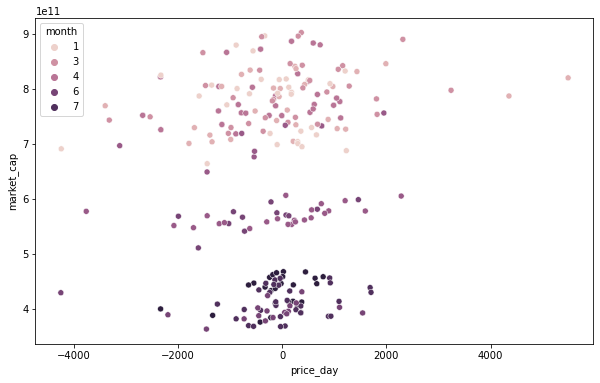

In [11]:
plt.figure(figsize = (10,6))
sns.scatterplot(x=df['price_day'], y=df['market_cap'], hue = df['month'])

<Figure size 576x432 with 0 Axes>

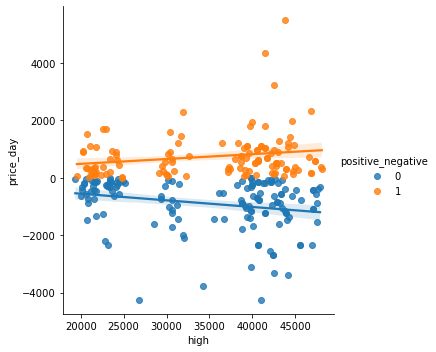

In [23]:
plt.figure(figsize = (8,6))
sns.lmplot(data = df, x='high', y='price_day', hue = 'positive_negative')